C:\Users\Guilleromo\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


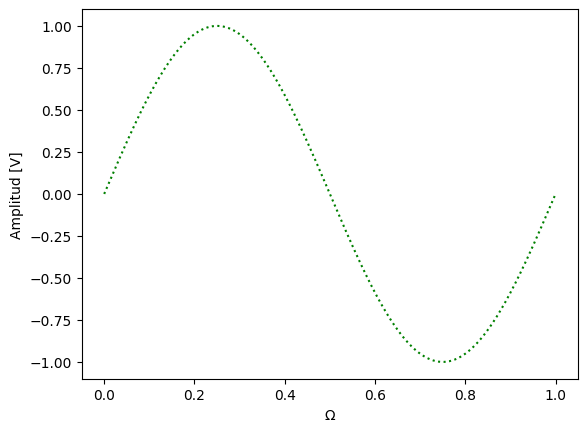

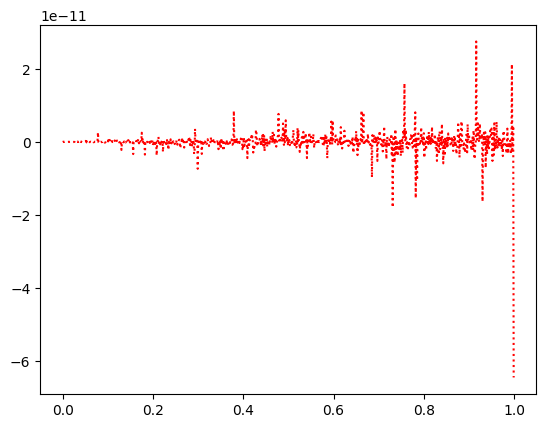

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 29 14:26:15 2022

@author: Guilleromo
"""

#Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

#XX = mi_funcion_DFT( xx )

#xx: señal a analizar, una matriz (Nx1) de números reales. 
#XX: DFT de xx, una matriz (Nx1) de números complejos.


import numpy as np
import matplotlib.pyplot as plt
# import muestreoSenoidal.py

N  = 1000#         muestras
fs = 1000 #Hz#  frec muestreo
Ts = 1/fs#      periodo

def mi_funcion_sen( vmax , dc , ff, ph, nn , fs ):

    ts = 1/fs
    tt = np.linspace(0,(N-1)*ts,nn) #0 a (N-1)*Ts)

    #tt = np.linspace(0,2*np.pi,num=nn)
    xx = dc + vmax*np.sin(2*np.pi*ff*tt + ph)
    return (tt, xx)


# ----------------------
[tt,xx] = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)
def mi_funcion_DFT( xx ):
    
    N = len(xx)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    XX = np.dot(e, xx)
    
    return XX
#---------------------
[tt,xx] = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)
plt.figure(1)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')  
plt.plot(tt,xx,"g:")

XX = mi_funcion_DFT( xx )
plt.xlabel('Ω')
ciclos=1
wmax=np.pi*ciclos

# ww = np.arange(-wmax, wmax,Ts)


plt.figure(2)
# plt.plot(ww,XX,"r:")
plt.plot(tt,XX,"r:")

#Codigo auxiliar
# #function [Xw, w] = DFT(n,xn)
#    N0 = np.length(xx)
#    w0 = 2*np.pi/N0
#    w  = np.arange(0 ,N0-1)*w0
#    Xw = np.zeros(np.size(w)
#    k=1
   
#    for ww in range(0 ,N-1*w0):                       
#        Xw[k]=sum(xx*np.exp(-1j*ww*N))
#        k=k+1
#        end
       
#        Xw[1]=sum(xx)
#        Xw=Xw/N0
#        XX=Xw
       
# return XX
# def DFT(x):
